In [6]:
import numpy as np
from aocd.models import Puzzle

# Tips

## Define the object
- `puzzle = Puzzle(year=2017, day=20)` 
- `Puzzle(2017, 20) at 0x107322978 - Particle Swarm>`
- get the input `puzzle.input_data`
- subbit by setting:
  - `puzzle.answer_a = value_a`
  - `puzzle.answer_b = value_b`

## Transform to list variables on multiple lines: 
 - t = '''asd
        asd 
        asd 
        asd'''.split('\n')

## Map a string list to integer 
- `map(int, list)`
- `np.array(p.input_data.split('\n'), dtype='int')`

## Day 1

In [553]:
puzzle = Puzzle(year=2023, day=1)

In [ ]:
import re

numbers = {
    "1": "1",
    "2": "2",
    "3": "3",
    "4": "4",
    "5": "5",
    "6": "6",
    "7": "7",
    "8": "8",
    "9": "9",
}

numbers_str = {
    "one": "1",
    "two": "2",
    "three": "3",
    "four": "4",
    "five": "5",
    "six": "6",
    "seven": "7",
    "eight": "8",
    "nine": "9",
}


def find_num(text, string_num=False):
    digits = []
    num = {**numbers_str, **numbers} if string_num else numbers
    for k, v in num.items():
        for i in re.finditer(k, text):
            digits.append((i.start(), v))

    digits = sorted(digits, key=lambda tup: tup[0])
    digits = [d[1] for d in digits]

    return digits


def first_last_digit(data, string_num=False):
    digits = []
    for d in data:
        digits.append(find_num(d, string_num))

    sum = 0
    for d in digits:
        if d:
            sum += int(d[0] + d[-1])
    return sum

In [ ]:
# validate example
ex_data = puzzle.examples[0].input_data.split("\n")
assert first_last_digit(ex_data) == 142

# second example
ex_data = [
    "two1nine",
    "eightwothree",
    "abcone2threexyz",
    "xtwone3four",
    "4nineeightseven2",
    "zoneight234",
    "7pqrstsixteen",
]
assert first_last_digit(ex_data, string_num=True) == 281

In [ ]:
data = puzzle.input_data.split("\n")
puzzle.answer_a = first_last_digit(data)

In [ ]:
puzzle.answer_b = first_last_digit(data, string_num=True)

# Day 2

In [ ]:
puzzle = Puzzle(year=2023, day=2)

In [ ]:
def parse_game(g):
    boxes = []
    for box in g.split(":")[1].split(";"):
        boxes.append(box.replace(",", "").split())
    return boxes


def count_colored_box(boxes):
    max_colors = {}
    for box in boxes:
        for i in range(0, len(box), 2):
            if box[i + 1] in max_colors:
                max_colors[box[i + 1]] = max(max_colors[box[i + 1]], int(box[i]))
            else:
                max_colors[box[i + 1]] = int(box[i])
    return max_colors

In [ ]:
data = puzzle.input_data.split("\n")

sum_ = 0
product = 0
for i, d in enumerate(data):
    boxes = parse_game(d)
    colors = count_colored_box(boxes)

    # get product of minimum required colors
    product += np.prod(list(colors.values()))

    if "red" in colors and colors["red"] > 12:
        continue
    if "green" in colors and colors["green"] > 13:
        continue
    if "blue" in colors and colors["blue"] > 14:
        continue

    # only sum if possible
    sum_ += i + 1

puzzle.answer_a = sum_
puzzle.answer_b = product

# Day 3

In [ ]:
puzzle = Puzzle(year=2023, day=3)

In [ ]:
def check_for_symbols(data, row, col0, col1, part_number, gears):
    for i in range(row - 1, row + 2):
        for j in range(col0 - 1, col1 + 1):
            # boundaries
            if i < 0 or i >= len(data) or j < 0 or j >= len(data[i]):
                continue

            # part b
            if data[i][j] == "*":
                if (i, j) not in gears:
                    gears[i, j] = []
                gears[i, j].append(int(part_number))

            if data[i][j] != "." and not data[i][j].isdigit():
                return True
    return False

In [ ]:
data = puzzle.examples[0].input_data.split("\n")


def find_parts(data):
    parts = []
    gears = {}
    for i, d in enumerate(data):
        part_number = ""
        for j, c in enumerate(d):
            if c.isdigit():
                part_number += c

            if part_number and (not c.isdigit() or j == len(d) - 1):
                end = j
                start = end - len(part_number)
                if check_for_symbols(data, i, start, end, part_number, gears):
                    parts.append(int(part_number))
                part_number = ""

    return parts, gears


# test
# part a
parts, gears = find_parts(data)
assert sum(parts) == 4361

# part b
ratio = 0
for parts in gears.values():
    if len(parts) == 2:
        ratio += parts[0] * parts[1]
assert ratio == 467835

In [ ]:
data = puzzle.input_data.split("\n")

# part a
parts, gears = find_parts(data)
puzzle.answer_a = sum(parts)

# part b
ratio = 0
for p in gears.values():
    if len(p) == 2:
        ratio += p[0] * p[1]
puzzle.answer_b = ratio

# Day 4

In [ ]:
puzzle = Puzzle(year=2023, day=4)

In [ ]:
def count_score(winning, numbers):
    nbmatch = np.sum(np.in1d(numbers, winning))
    if nbmatch:
        score = 1 * 2 ** (nbmatch - 1)
    else:
        score = 0
    return nbmatch, score


def get_score(data):
    score = 0

    # initialize with one card
    card = np.ones(len(data), dtype="int")

    for i, d in enumerate(data):
        d = d.split(":")[1].strip().split("|")
        winning = d[0].split()
        numbers = d[1].split()
        nbmatch, score_i = count_score(winning, numbers)
        score += score_i

        # part b
        for j in range(1, int(nbmatch) + 1):
            try:
                card[i + j] += card[i]
            except:
                # no cards over the limit
                pass

    return score, card


data = puzzle.examples[0].input_data.split("\n")
score, card = get_score(data)
assert score == 13
assert sum(card) == 30

In [ ]:
data = puzzle.input_data.split("\n")
score, card = get_score(data)
puzzle.answer_a = score
puzzle.answer_b = sum(card)

# Day 5

In [ ]:
puzzle = Puzzle(year=2023, day=5)

In [ ]:
def init_mapping(data):
    maps = {}
    c = -1
    for d in data[1:]:
        if "map:" in d:
            c += 1
            maps[c] = []
            continue
        if not d:
            continue

        d = d.split()
        maps[c].append([int(d[0]), int(d[1]), int(d[2])])

    return maps


def get_min_locations(data, seeds):
    # this works for a few seeds but had to do
    # work with ranges and not individual seeds
    # for part b
    maps = init_mapping(data)

    location = []
    for seed in seeds:
        seed = int(seed) if isinstance(seed, str) else seed

        for level, list_map in maps.items():
            for map in list_map:
                d, s, dim = map

                # check if seed >= s and seed < s+dim
                # (seed - s) >= 0 and (seed - s) < dim
                # return d + (seed - s)
                offset = seed - s
                if offset >= 0 and offset < dim:
                    seed = d + offset
                    break
        location.append(seed)
    return min(location)


def get_min_locations_range(data, seeds):
    maps = init_mapping(data)

    # clip the ranges for all the steps
    for level, list_map in maps.items():
        next_level = []
        while len(seeds) > 0:
            # transform range
            seed = seeds.pop()  # (min, max) of range
            for map in list_map:
                d, s, dim = map

                # overlapping section
                i0 = max(seed[0], s)
                i1 = min(seed[1], s + dim)

                if i0 < i1:
                    # apply transformation
                    next_level.append((d + i0 - s, d + i1 - s))

                    # before / after overlapping
                    # where seed value is not transformed
                    # leave in seeds so it can be picked
                    # up in other mapping on the same level
                    if i0 > seed[0]:
                        seeds.append((seed[0], i0))
                    if seed[1] > i1:
                        seeds.append((i1, seed[1]))
                    break

            # if not break
            # that means there is no overlap
            # so we add back the complete range
            # since we can't simplify it
            else:
                next_level.append(seed)
        seeds = next_level
    return min(seeds)[0]


def create_seeds_range(l):
    seeds = []
    for i in range(0, len(l), 2):
        seeds.append((int(l[i]), int(l[i]) + int(l[i + 1])))
    return seeds


# tests with example data
data = puzzle.examples[0].input_data.split("\n")
seeds = data[0].split(":")[1].split()
assert get_min_locations(data, seeds) == 35

seeds = create_seeds_range(data[0].split(":")[1].split())
assert get_min_locations_range(data, seeds) == 46

In [ ]:
data = puzzle.input_data.split("\n")
seeds = data[0].split(":")[1].split()
puzzle.answer_a = get_min_locations(data, seeds)

In [ ]:
data = puzzle.input_data.split("\n")
seeds = create_seeds_range(data[0].split(":")[1].split())
puzzle.answer_b = get_min_locations_range(data, seeds)

# Day 6

In [ ]:
puzzle = Puzzle(year=2023, day=6)
data = puzzle.input_data.split("\n")
times = list(map(int, data[0].split(":")[1].split()))
distances = list(map(int, data[1].split(":")[1].split()))

In [ ]:
def winning_ways(times, distances):
    possible_ways = []
    for time, record_distance in zip(times, distances):
        dist = []
        for charge in range(1, time):
            dist.append(charge * (time - charge))
        possible_ways.append(sum([1 for d in dist if d > record_distance]))
    return possible_ways


puzzle.answer_a = np.prod(winning_ways(times, distances))
puzzle.answer_b = np.prod(
    winning_ways([int("".join(map(str, times)))], [int("".join(map(str, distances)))])
)

# Day 7

In [ ]:
puzzle = Puzzle(year=2023, day=7)

In [ ]:
cards_value = ["2", "3", "4", "5", "6", "7", "8", "9", "T", "J", "Q", "K", "A"]

cards_value_wildcard = cards_value.copy()
cards_value_wildcard.remove("J")
cards_value_wildcard.insert(0, "J")


def card_rank(card, wildcard=False):
    card_lst = list(card)

    value = cards_value_wildcard if wildcard else cards_value
    ranked_card = [value.index(c) for c in card_lst]
    u, c = np.unique(card_lst, return_counts=True)

    # modify "J" if we are using wildcards
    if wildcard and "J" in card_lst:
        # remove J from the list to find highest
        card_sub_lst = [c for c in card_lst.copy() if c != "J"]

        # check if not all "J"
        if card_sub_lst:
            u, c = np.unique(card_sub_lst, return_counts=True)
            best_card = u[np.where(c == max(c))[0][-1]]
            new_card = card.replace("J", best_card)
            new_card_lst = list(new_card)

            # new unique with the replacement card
            u, c = np.unique(new_card_lst, return_counts=True)

    # return rank of current hand
    if len(u) == 1:  # Five of a kind
        rank = 7
    elif len(u) == 2:
        if max(c) == 4:  # four of a kind
            rank = 6
        else:  # Full house
            rank = 5
    elif any(c == 3):  # three of a kind
        rank = 4
    elif np.sum(c == 2) == 2:  # two pairs
        rank = 3
    elif np.sum(c == 2) == 1:
        rank = 2
    else:
        rank = 1

    return rank, ranked_card


def bets(data, wildcard=False):
    # debug purpose
    cards = []

    bets = []
    list_hands = []
    for d in data:
        card, bet = d.split()
        rank, card_values = card_rank(card, wildcard)
        list_hands.append((rank, card_values))
        bets.append(bet)
        cards.append(card)

    ered = sorted(range(len(list_hands)), key=lambda k: list_hands[k])
    bets = [int(bets[i]) for i in ordered]

    # debug purpose
    list_hands = sorted(list_hands)
    cards = [cards[i] for i in ordered]

    return np.dot(np.arange(1, len(bets) + 1), bets)


# validate tests
data = puzzle.examples[0].input_data.split("\n")
assert bets(data) == 6440
assert bets(data, wildcard=True) == 5905

In [ ]:
data = puzzle.input_data.split("\n")
puzzle.answer_a = bets(data)
puzzle.answer_b = bets(data, wildcard=True)

# Day 8

In [ ]:
puzzle = Puzzle(year=2023, day=8)

In [ ]:
def parse_network(data):
    network = {}

    # this is ugly
    for d in data:
        r = d.split("=")
        key = r[0].strip()
        lr = r[1].split(",")
        l = lr[0].strip().strip("(")
        r = lr[1].strip().strip(")")

        network[key] = {"L": l, "R": r}

    return network


def solve_network(network, moves, pos="AAA", end=re.compile(r"^ZZZ$")):
    steps = 0
    while not end.match(pos):
        next_move = moves[steps % len(moves)]
        pos = network[pos][next_move]
        steps += 1
    return steps


# part a
data = puzzle.examples[0].input_data.split("\n")
moves, _, *rest = data
network = parse_network(rest)
steps = solve_network(network, moves)

assert steps == 2

# test part b
from math import lcm

data = [
    "LR",
    "",
    "11A = (11B, XXX)",
    "11B = (XXX, 11Z)",
    "11Z = (11B, XXX)",
    "22A = (22B, XXX)",
    "22B = (22C, 22C)",
    "22C = (22Z, 22Z)",
    "22Z = (22B, 22B)",
    "XXX = (XXX, XXX)",
]

moves, _, *rest = data
network = parse_network(rest)
pos = [p for p in network.keys() if p[2] == "A"]

steps = []
for p in pos:
    steps.append(solve_network(network, moves, p, end=re.compile(r"^[A-Z0-9]{2}Z$")))
assert lcm(*steps) == 6

In [ ]:
data = puzzle.input_data.split("\n")
moves, _, *rest = data
network = parse_network(rest)
puzzle.answer_a = solve_network(network, moves)

In [ ]:
# there is one exit per start
# so we can find the steps per exit
# and get the lcm

# refactored using re to match
# case a with: re.compile(r"^ZZZ$")
# case a with: re.compile(r"^[A-Z0-9]{2}Z$")
# ^/$ check beginning/end of str

pos = [p for p in network.keys() if p[2] == "A"]
steps = []
for p in pos:
    steps.append(solve_network(network, moves, p, end=re.compile(r"^[A-Z0-9]{2}Z$")))
puzzle.answer_b = lcm(*steps)

# Day 9

In [ ]:
puzzle = Puzzle(year=2023, day=9)

In [ ]:
def extrapolated_history(data, dir="forward"):
    history = []

    for d in data:
        d = list(map(int, d.split()))
        rows = [d]
        while not all([el == 0 for el in d]):
            d_new = [d[i] - d[i - 1] for i in range(1, len(d))]
            rows.append(d_new)
            d = d_new

        # adding this zero doesn't change anything
        # just to have the same structure
        rows[-1].append(0)

        if dir == "forward":
            for i in range(len(rows) - 2, -1, -1):
                # next number is the derivative value
                # which is the next row
                rows[i].append(rows[i][-1] + rows[i + 1][-1])
            history.append(rows[0][-1])
        elif dir == "backward":
            for i in range(len(rows) - 2, -1, -1):
                rows[i].insert(0, rows[i][0] - rows[i + 1][0])
            history.append(rows[0][0])
    return history


data = puzzle.examples[0].input_data.split("\n")
assert sum(extrapolated_history(data)) == 114
assert sum(extrapolated_history(data, dir="backward")) == 2

In [ ]:
data = puzzle.input_data.split("\n")
puzzle.answer_a = sum(extrapolated_history(data))
puzzle.answer_b = sum(extrapolated_history(data, dir="backward"))

# Day 10

In [ ]:
puzzle = Puzzle(year=2023, day=10)

In [ ]:
def find_maze_start(data):
    for i, row in enumerate(data):
        for j, el in enumerate(row):
            if el == "S":
                return (i, j)


def find_possible_dir(data, maze, tile):
    indices = []
    i, j = tile
    c = data[i][j]
    if c == "|":
        dir = ["N", "S"]
    elif c == "-":
        dir = ["W", "E"]
    elif c == "L":
        dir = ["N", "E"]
    elif c == "F":
        dir = ["S", "E"]
    else:
        dir = ["N", "E", "S", "W"]

    # from south: south-north, south-east, south-west
    try:
        from_south = ["|", "7", "F", "S"]
        if "N" in dir and i > 0 and data[i - 1][j] in from_south:
            indices.append((i - 1, j))
    except:
        pass

    # from west: west-east, west-north, west-south
    try:
        from_west = ["-", "J", "7", "S"]
        if "E" in dir and data[i][j + 1] in from_west:
            indices.append((i, j + 1))
    except:
        pass

    # from north: north-south, north-east, north-west
    try:
        from_north = ["|", "L", "J", "S"]
        if "S" in dir and data[i + 1][j] in from_north:
            indices.append((i + 1, j))
    except:
        pass

    # from east: east-west, east-north, east-south
    try:
        from_east = ["-", "L", "F", "S"]
        if "W" in dir and j > 0 and data[i][j - 1] in from_east:
            indices.append((i, j - 1))
    except:
        pass

    # path can't go back to itself
    indices = [i for i in indices if i not in maze[1:]]

    return indices


def solve_maze(data, debug=False):
    # find initial position
    start = find_maze_start(data)

    # one list for the maze
    maze = []
    maze.append(start)

    # one dictionary
    # index of maze -> possible directions
    bifurcations = {}

    tile = start
    # for i in range(0, 20):
    while True:
        if debug:
            print(f"{maze=}")
        split = find_possible_dir(data, maze, tile)

        # add possible paths to bifurcations
        # list at the current index of the paths
        if len(split):
            for s in split:
                if len(maze) not in bifurcations:
                    bifurcations[len(maze)] = []
                bifurcations[len(maze)].append(s)
        # reach end of a path
        else:
            # delete until last bifurcation
            while len(maze) > max(bifurcations.keys()):
                if debug:
                    print("backtracking")
                maze.pop()

        # get one of the next possibility
        # if bifurcations[len(maze)]:
        if debug:
            print(f"{bifurcations[len(maze)]=}")
        tile = bifurcations[len(maze)].pop()
        if len(bifurcations[len(maze)]) == 0:
            del bifurcations[len(maze)]

        if debug:
            print(f"{tile=}")
            print()

        if tile == start:
            break
        maze.append(tile)
    return maze


from matplotlib.path import Path


def loop_area(loop):
    # create matplotlib path
    cloop = loop.copy()
    cloop.append(cloop[0])
    path = Path(cloop)

    sum = 0
    # min/max rows
    rmin = min([x[0] for x in loop])
    rmax = max([x[0] for x in loop])
    for i in range(rmin, rmax + 1):
        row = [xy for xy in loop if xy[0] == i]
        cmin = min([x[1] for x in row])
        cmax = max([x[1] for x in row])

        for j in range(cmin + 1, cmax):
            tile = (i, j)
            # must not be in loop and inside the path
            if tile not in loop and path.contains_point(tile):
                sum += path.contains_point((i, j))
    return sum


# test part a
data = ["-L|F7", "7S-7|", "L|7||", "-L-J|", "L|-JF"]
data = [list(d) for d in data]
loop = solve_maze(data, debug=False)
assert int(np.ceil(len(loop) / 2)) == 4

# test part b
data = [
    "...........",
    ".S-------7.",
    ".|F-----7|.",
    ".||.....||.",
    ".||.....||.",
    ".|L-7.F-J|.",
    ".|..|.|..|.",
    ".L--J.L--J.",
    "...........",
]
loop = solve_maze(data, debug=False)
assert loop_area(loop) == 4

In [ ]:
data = puzzle.input_data.split("\n")
loop = solve_maze(data, debug=False)
puzzle.answer_a = int(np.ceil(len(loop) / 2))
puzzle.answer_b = loop_area(loop)

In [ ]:
# i tried this for fun
# but it doesn't work for some reason
def plot_maze(ax, data, loop):
    cloop = [(l[1], l[0]) for l in loop]
    cloop = loop.copy()
    cloop.append(cloop[0])
    path = Path(cloop)

    map = np.full((len(data) * 3, len(data[0]) * 3), -1)
    for i in range(0, len(data)):
        for j in range(0, len(data[i])):
            t = data[j][i]
            if path.contains_point((j, i)):
                if t == "|":
                    repr = [[1, 0, 1], [1, 0, 1], [1, 0, 1]]
                elif t == "-":
                    repr = [[1, 1, 1], [0, 0, 0], [1, 1, 1]]
                elif t == "L":
                    repr = [[1, 0, 1], [1, 0, 0], [1, 1, 1]]
                elif t == "J":
                    repr = [[1, 0, 1], [0, 0, 1], [1, 1, 1]]
                elif t == "7":
                    repr = [[1, 1, 1], [0, 0, 1], [1, 0, 1]]
                elif t == "F":
                    repr = [[1, 1, 1], [1, 0, 0], [1, 0, 1]]
                elif t == ".":
                    repr = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
                elif t == "S":
                    repr = [[1, 0, 1], [0, 0, 0], [1, 0, 1]]
                map[slice(3 * j, 3 * (j + 1)), slice(3 * i, 3 * (i + 1))] = repr
        pcm = ax.pcolormesh(map, cmap="inferno")
    return pcm


# fig = plt.figure(dpi=200)
# ax = fig.add_subplot(1, 1, 1)
# pcm = plot_maze(ax, data, loop)
# fig.colorbar(pcm)

# Day 11

In [ ]:
puzzle = Puzzle(year=2023, day=11)

In [ ]:
def empty_area(data):
    rows = []
    cols = []
    for i, row in enumerate(data):
        if all([True if el == "." else False for el in row]):
            rows.append(i)
    for i in range(0, len(data[0])):
        if all(row[i] == "." for row in data):
            cols.append(i)
    return rows, cols


def expand_galaxy(data, empty):
    data_exp = [x[:] for x in data]
    ii, jj = empty
    for d in data_exp:
        for j in jj[::-1]:
            d.insert(j, ".")
    line = list("." * len(data_exp[0]))
    for i in ii[::-1]:
        data_exp.insert(i, line)
    return data_exp


def list_galaxy(data):
    data_lst = [x[:] for x in data]
    c = 1
    galaxies = {}
    for i, row in enumerate(data_lst):
        for j, el in enumerate(row):
            if el == "#":
                data_lst[i][j] = str(c)
                galaxies[c] = (i, j)
                c += 1
    return data_lst, galaxies


import itertools


def grid_distance(galaxies, r=None, c=None, expansion=2):
    nb_galaxies = len(galaxies)
    dist = {}
    for p in list(itertools.combinations(np.arange(1, nb_galaxies + 1), 2)):
        g0 = galaxies[p[0]]
        g1 = galaxies[p[1]]
        diff = [abs(g0[0] - g1[0]), abs(g0[1] - g1[1])]

        if r and c:
            empty_r = sum(
                [1 for i in r if i > min(g0[0], g1[0]) and i < max(g0[0], g1[0])]
            )
            empty_c = sum(
                [1 for i in c if i > min(g0[1], g1[1]) and i < max(g0[1], g1[1])]
            )
            diff[0] += empty_r * (expansion - 1)
            diff[1] += empty_c * (expansion - 1)

        moves = abs(min(diff)) * 2 + max(diff) - min(diff)
        dist[p] = moves

    return dist


# example
data = puzzle.examples[0].input_data.split("\n")
data = [list(d) for d in data]
r, c = empty_area(data)
data_exp = expand_galaxy(data, (r, c))
data_exp, galaxies = list_galaxy(data_exp)
dist = grid_distance(galaxies)
assert sum(list(dist.values())) == 374

# expansion perform in grid_distance()
r, c = empty_area(data)
data, galaxies = list_galaxy(data)
assert sum(list(grid_distance(galaxies, r=r, c=c, expansion=2).values())) == 374
assert sum(list(grid_distance(galaxies, r=r, c=c, expansion=10).values())) == 1030
assert sum(list(grid_distance(galaxies, r=r, c=c, expansion=100).values())) == 8410

In [ ]:
# part a
data = puzzle.input_data.split("\n")
data = [list(d) for d in data]
r, c = empty_area(data)
data_exp = expand_galaxy(data, (r, c))
data_exp, galaxies = list_galaxy(data_exp)
dist = grid_distance(galaxies)
puzzle.answer_a = sum(list(dist.values()))

# part b
data, galaxies = list_galaxy(data)
dist = grid_distance(galaxies, r=r, c=c, expansion=1_000_000)
puzzle.answer_b = sum(list(dist.values()))

# Day 12

In [ ]:
puzzle = Puzzle(year=2023, day=12)

In [ ]:
def possible_layout(layout):
    layouts = []

    def helper(current, index):
        if index == len(layout):
            return layouts.append(current)

        if layout[index] == "?":
            helper(current + ".", index + 1)
            helper(current + "#", index + 1)
        else:
            helper(current + layout[index], index + 1)

    helper("", 0)
    return layouts


def contiguous_group(spring):
    counts = []
    c = 0
    for s in spring:
        if s == "#":
            c += 1
        else:
            if c:
                counts.append(c)
            c = 0
    if c:
        counts.append(c)
    return counts


def matches(pattern, seq):
    pattern = (5 * (pattern + "?"))[:-1]
    seq = 5 * seq.split(",")

    # minimal pattern
    states = "."
    for nr in seq:
        for i in range(int(nr)):
            states += "#"
        states += "."

    states_dict = {0: 1}
    new_dict = {}
    for c in pattern:
        for s in states_dict:
            if c == "?":
                if s + 1 < len(states):
                    new_dict[s + 1] = new_dict.get(s + 1, 0) + states_dict[s]
                if states[s] == ".":
                    new_dict[s] = new_dict.get(s, 0) + states_dict[s]

            elif c == ".":
                if s + 1 < len(states) and states[s + 1] == ".":
                    new_dict[s + 1] = new_dict.get(s + 1, 0) + states_dict[s]
                if states[s] == ".":
                    new_dict[s] = new_dict.get(s, 0) + states_dict[s]

            elif c == "#":
                if s + 1 < len(states) and states[s + 1] == "#":
                    new_dict[s + 1] = new_dict.get(s + 1, 0) + states_dict[s]
        states_dict = new_dict
        new_dict = {}
    return states_dict.get(len(states) - 1, 0) + states_dict.get(len(states) - 2, 0)


def arrangements(data):
    c = 0
    for d in data:
        pattern, seq = d.split()
        layouts = possible_layout(pattern)

        for l in layouts:
            if ",".join(map(str, contiguous_group(l))) == seq:
                c += 1
    return c


def arrangements_b(data):
    c = 0
    for d in data:
        pattern, seq = d.split()
        c += matches(pattern, seq)
    return c

In [ ]:
data = [
    "???.### 1,1,3",
    ".??..??...?##. 1,1,3",
    "?#?#?#?#?#?#?#? 1,3,1,6",
    "????.#...#... 4,1,1",
    "????.######..#####. 1,6,5",
    "?###???????? 3,2,1",
]

assert arrangements(data) == 21
assert arrangements_b(data) == 525152

In [ ]:
%%time
data = puzzle.input_data.split("\n")
puzzle.answer_a = arrangements(data)
puzzle.answer_b = arrangements_b(data)

# Day 13

In [ ]:
puzzle = Puzzle(year=2023, day=13)

In [ ]:
def horizontal_mirror(data, smudge=False):
    for c in range(1, data.shape[1]):
        nl = c
        nr = data.shape[1] - c
        width = min(nl, nr)
        l = data[:, c - width : c]
        r = data[:, c : c + width]

        diff = np.sum(~np.logical_and(np.ones_like(l, dtype="bool"), np.fliplr(l) == r))
        if diff == 0 and not smudge:
            return c
        elif diff == 1 and smudge:
            return c
    return 0


def vertical_mirror(data, smudge=False):
    for r in range(1, data.shape[0]):
        nt = r
        nb = data.shape[0] - r
        height = min(nt, nb)
        t = data[r - height : r, :]
        b = data[r : r + height, :]

        diff = np.sum(~np.logical_and(np.ones_like(t, dtype="bool"), np.flipud(t) == b))
        if diff == 0 and not smudge:
            return r
        elif diff == 1 and smudge:
            return r
    return 0


def count_mirror(data_, smudge=False):
    # convert to list(list)
    data = [[]]
    for line in data_:
        if line.strip() == "":
            data.append([])
        else:
            data[-1].append(list(line))
    count = 0
    for d in data:
        d = np.array(d)
        c = horizontal_mirror(d, smudge)
        r = vertical_mirror(d, smudge)
        count += c + 100 * r
    return count

In [ ]:
data = puzzle.examples[0].input_data.split("\n")
assert count_mirror(data) == 405
assert count_mirror(data, smudge=True) == 400

In [ ]:
data = puzzle.input_data.split("\n")
puzzle.answer_a = count_mirror(data)
puzzle.answer_b = count_mirror(data, smudge=True)

# Day 14

In [ ]:
puzzle = Puzzle(year=2023, day=14)

In [ ]:
data = puzzle.examples[0].input_data.split("\n")

In [ ]:
def init_field(data):
    titled = np.zeros_like(data)
    for i, row in enumerate(data):
        for j, c in enumerate(row):
            if c == "#":
                titled[i, j] = "#"
            else:
                titled[i, j] = "."
    titled[0] = data[0]
    return data, titled


def move_north(data, dir="n"):
    if isinstance(data, list):
        data = np.array([list(d) for d in data])

    if dir != "n":
        data = np.rot90(data, 3)

    data, titled = init_field(data)

    for i in range(1, len(data)):
        if boulders := [i for i, v in enumerate(data[i, :]) if v == "O"]:
            for c in boulders:
                w = max([i if v == "#" else -1 for i, v in enumerate(titled[:i, c])])
                b = max([i if v == "O" else -1 for i, v in enumerate(titled[:i, c])])
                new_r = max(w, b) + 1
                titled[new_r, c] = "O"
    return titled


def calc_load(data):
    nblines = len(data)
    sum = 0
    for i, row in enumerate(data):
        sum += (nblines - i) * np.sum(row == "O")
    return sum

In [ ]:
# test
ans = [
    "OOOO.#.O..",
    "OO..#....#",
    "OO..O##..O",
    "O..#.OO...",
    "........#.",
    "..#....#.#",
    "..O..#.O.O",
    "..O.......",
    "#....###..",
    "#....#....",
]
ans = np.array([list(d) for d in ans])

data = puzzle.examples[0].input_data.split("\n")
titled = move_north(data)
assert np.all(titled == ans)
assert calc_load(titled) == 136

# part b
l = []
for i in range(200):
    for dir in ["n", "w", "s", "e"]:
        data = move_north(data, dir)
    data = np.rot90(data, 3)
    l.append(calc_load(data))
# hopefully that's enough
for i in range(int(len(l) / 2)):
    for j in range(2, int(len(l))):
        if l[i : i + j] == l[i + j : i + 2 * j]:
            pattern = l[i : i + ir]
            break
    else:
        continue
    break
assert pattern[(1_000_000_000 - i - 1) % len(pattern)] == 64

In [ ]:
data = puzzle.input_data.split("\n")
titled = move_north(data)
puzzle.answer_a = calc_load(titled)

loads = []
# increased until a cycle was found
for i in range(300):
    for dir in ["n", "w", "s", "e"]:
        data = move_north(data, dir)
    data = np.rot90(data, 3)
    loads.append(calc_load(data))

# look for repeated sequence
for i in range(int(len(loads) / 2)):
    for j in range(2, int(len(loads))):
        if loads[i : i + j] == loads[i + j : i + 2 * j]:
            pattern = loads[i : i + j]
            break
    else:
        continue
    break
puzzle.answer_b = pattern[(1_000_000_000 - i - 1) % len(pattern)]

# Day 15

In [ ]:
puzzle = Puzzle(year=2023, day=15)

In [ ]:
def hash(letters):
    count = 0
    for l in letters:
        count += ord(l)
        count *= 17
        count = count % 256
    return count


def fill_boxes(data, debug=False):
    boxes = {i: {} for i in range(0, 256)}
    for seq in data[0].split(","):
        if "=" in seq:
            seq = seq.split("=")
            h = hash(seq[0])
            # keep same order
            # but change the value
            if seq[0] in boxes[h]:
                boxes[h][seq[0]] = (boxes[h][seq[0]][0], int(seq[1]))
            else:
                boxes[h][seq[0]] = (len(boxes[h]) + 1, int(seq[1]))
        elif "-" in seq:
            seq = seq.split("-")
            h = hash(seq[0])

            # remove from box
            if seq[0] in boxes[h]:
                order = boxes[h][seq[0]][0]
                del boxes[h][seq[0]]
                # decrease order of box
                # further in that box's list
                for k in boxes[h]:
                    if boxes[h][k][0] > order:
                        boxes[h][k] = (boxes[h][k][0] - 1, boxes[h][k][1])
        if debug:
            for i in range(0, 5):
                print(boxes[i])
    return boxes


# example
data = puzzle.examples[0].input_data.split("\n")
sum = 0
for seq in data[0].split(","):
    sum += hash(seq)
assert sum == 1320

count = 0
boxes = fill_boxes(data)
for box, values in boxes.items():
    for tag, (order, lens) in values.items():
        count += (box + 1) * order * lens
assert count == 145

In [ ]:
data = puzzle.input_data.split("\n")
sum = 0
for seq in data[0].split(","):
    sum += hash(seq)
puzzle.answer_a = sum

count = 0
boxes = fill_boxes(data)
for box, values in boxes.items():
    for tag, (order, lens) in values.items():
        count += (box + 1) * order * lens
puzzle.answer_b = count

# Day 16

In [ ]:
puzzle = Puzzle(year=2023, day=16)

In [ ]:
def mirror_direction(el, dir):
    if (el == "/" and dir == ">") or (el == "\\" and dir == "<"):
        return "^"
    elif (el == "/" and dir == "<") or (el == "\\" and dir == ">"):
        return "V"
    elif (el == "/" and dir == "^") or (el == "\\" and dir == "V"):
        return ">"
    elif (el == "/" and dir == "V") or (el == "\\" and dir == "^"):
        return "<"


# move only one step at the time
# add next position or direction to the stack
def move(pos, dir, data, energized):
    width, height = len(data[0]), len(data)

    stack = [(pos, dir)]
    while stack:
        pos, dir = stack.pop()
        row, col = pos
        el = data[row][col]

        # mirror changes direction
        if el == "/" or el == "\\":
            dir = mirror_direction(el, dir)

        # create two beam
        # from the current location
        if el == "-" and dir in ["^", "V"]:
            stack.append((pos, ">"))
            stack.append((pos, "<"))
        elif el == "|" and dir in [">", "<"]:
            stack.append((pos, "^"))
            stack.append((pos, "V"))
        # move to the next position
        else:
            # add direction to map
            # to know if we pass here
            if el == "." or el in ["^", "V", "<", ">"]:
                if data[row][col] == dir:
                    continue
                data[row][col] = dir

            # update position
            if dir == "^":
                row -= 1
            elif dir == "V":
                row += 1
            elif dir == "<":
                col -= 1
            elif dir == ">":
                col += 1

            # add to stack
            if row >= 0 and row < height and col >= 0 and col < width:
                energized.append((row, col))
                stack.append(((row, col), dir))
    return energized


def beam_in(data_, start=(0, 0), dir=">"):
    data = [row.copy() for row in data_]
    energized = [start]
    energized = move(start, dir, data, energized)
    return energized


# part a
data = puzzle.examples[0].input_data.split("\n")
data = [list(d) for d in data]
assert len(set(beam_in(data))) == 46

# part b
total_energized = []
for i in range(len(data)):  # top/bottom
    total_energized.append(len(set(beam_in(data, start=(0, i), dir="V"))))
    total_energized.append(len(set(beam_in(data, start=(len(data) - 1, i), dir="^"))))
for i in range(len(data[0])):  # left/right
    total_energized.append(len(set(beam_in(data, start=(i, 0), dir=">"))))
    total_energized.append(
        len(set(beam_in(data, start=(i, len(data[0]) - 1), dir="<")))
    )
assert max(total_energized) == 51

In [ ]:
data = puzzle.input_data.split("\n")
data = [list(d) for d in data]
puzzle.answer_a = len(set(beam_in(data)))

# part b
total_energized = []
for i in range(len(data)):  # top/bottom
    total_energized.append(len(set(beam_in(data, start=(0, i), dir="V"))))
    total_energized.append(len(set(beam_in(data, start=(len(data) - 1, i), dir="^"))))
for i in range(len(data[0])):  # left/right
    total_energized.append(len(set(beam_in(data, start=(i, 0), dir=">"))))
    total_energized.append(
        len(set(beam_in(data, start=(i, len(data[0]) - 1), dir="<")))
    )
puzzle.answer_b = max(total_energized)

# Day 17

In [ ]:
puzzle = Puzzle(year=2023, day=17)

In [ ]:
from collections import deque, namedtuple


# found this here
# https://stackabuse.com/courses/graphs-in-python-theory-and-implementation/lessons/a-star-search-algorithm/
# had to modified mostly the get_neighbors to add conditions
class Graph:
    def __init__(self, data, part_b=False):
        self.weight = data

    def get_neighbors_a(self, state):
        pos, dir, step = state

        for next_dir in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            # no backward
            if next_dir == (-dir[0], -dir[1]):
                continue

            # maximum three steps
            if step == 3 and dir == next_dir:
                continue

            next_pos = (pos[0] + next_dir[0], pos[1] + next_dir[1])
            if (
                next_pos[0] < 0
                or next_pos[0] >= len(self.weight)
                or next_pos[1] < 0
                or next_pos[1] >= len(self.weight[0])
            ):
                continue

            cost = self.weight[next_pos[0]][next_pos[1]]

            next_step = step + 1 if next_dir == dir else 1
            next_state = State(next_pos, next_dir, next_step)

            yield cost, next_state

    def get_neighbors_b(self, state):
        pos, dir, step = state

        for next_dir in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            # no backward
            if next_dir == (-dir[0], -dir[1]):
                continue

            # keep going at least 4 steps
            if step > 0 and step < 4:
                if next_dir != dir:
                    continue

            # maximum ten steps
            if step == 10 and dir == next_dir:
                continue

            next_pos = (pos[0] + next_dir[0], pos[1] + next_dir[1])
            if (
                next_pos[0] < 0
                or next_pos[0] >= len(self.weight)
                or next_pos[1] < 0
                or next_pos[1] >= len(self.weight[0])
            ):
                continue

            cost = self.weight[next_pos[0]][next_pos[1]]

            next_step = step + 1 if next_dir == dir else 1
            next_state = State(next_pos, next_dir, next_step)

            yield cost, next_state

    # heuristic function
    # not sure what this is..
    def h(self, s):
        return 0

    def a_star_algorithm(self, start_node, goal_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            # find a node with the lowest value of f() - evaluation function

            # it would be better to put the node in the correct order
            # so we don't have the find the minimum each time
            if open_list:
                n = min(open_list, key=lambda v: g[v] + self.h(v))
            else:
                print("Path does not exist!")
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            # if n.pos == goal_node:  # part a
            if n.pos == goal_node and n.step >= 4:  # extra rule for part b
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)
                reconst_path.reverse()

                # print("Path found: {}".format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            # for weight, m in self.get_neighbors_a(n):
            for weight, m in self.get_neighbors_b(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print("Path does not exist!")
        return None


def heat_loss(path):
    heat = 0
    for s in path[1:]:
        heat += g.weight[s.pos[0]][s.pos[1]]
    return heat

In [ ]:
# store
# position tuple
# direction tuple
# steps int: number of step in the same direction
State = namedtuple("State", "pos dir step")

In [ ]:
%%time
# test part a/b
data = puzzle.examples[0].input_data.split("\n")
data = [list(map(int, list(d))) for d in data]

start_pos = (0, 0)
start_state = State(start_pos, (0, 0), 0)
goal_pos = (len(data) - 1, len(data[0]) - 1)

g = Graph(data)
p = g.a_star_algorithm(start_state, goal_pos)
# assert heat_loss(p) == 102
assert heat_loss(p) == 94

In [ ]:
%%time
# I have two neighbors functions now and have to comment
# there is also an extra conditions to reach the goal n >= 4
# out one line to do part a and part b
data = puzzle.input_data.split("\n")
data = [list(map(int, list(d))) for d in data]

start_pos = (0, 0)
start_state = State(start_pos, (0, 0), 0)
goal_pos = (len(data) - 1, len(data[0]) - 1)

g = Graph(data)
# p = g.a_star_algorithm(start_state, goal_pos)
# heat_loss(p) # part a 956, part b 1106

# Day 18

In [ ]:
puzzle = Puzzle(year=2023, day=18)

In [ ]:
from skspatial.measurement import area_signed


def digger_path(data, c=(0, 0), part_b=False):
    path = []
    perimeter = 0
    for m in data:
        dir, steps, color = m.split()
        steps = int(steps)

        if part_b:
            steps = int(color[2:7], 16)
            dir_mapping = {"0": "R", "1": "D", "2": "L", "3": "U"}
            dir = dir_mapping.get(color[7], "")

        if dir == "U":
            c = (c[0] - steps, c[1])
        if dir == "D":
            c = (c[0] + steps, c[1])
        if dir == "L":
            c = (c[0], c[1] - steps)
        if dir == "R":
            c = (c[0], c[1] + steps)

        path.append(c)
        perimeter += steps

    return path, perimeter


def get_area(path, perimeter):
    coords = [[c[0], c[1]] for c in path]
    return int(abs(area_signed(coords)) + perimeter / 2 + 1)


data = puzzle.examples[0].input_data.split("\n")
path, perimeter = digger_path(data)
assert get_area(path, perimeter) == 62
path, perimeter = digger_path(data, part_b=True)
assert get_area(path, perimeter) == 952408144115

In [ ]:
data = puzzle.input_data.split("\n")
path, perimeter = digger_path(data)
puzzle.answer_a = get_area(path, perimeter)

path, perimeter = digger_path(data, part_b=True)
puzzle.answer_b = get_area(path, perimeter)

# Day 19

In [ ]:
puzzle = Puzzle(year=2023, day=19)

In [ ]:
def parse_rules(data):
    rules = {}
    for d in data:
        k, v = d.strip("}").split("{")
        v = [i.split(":") for i in v.split(",")]
        eq = [(i[0], i[1], int(i[2:]), j) for i, j in v[:-1]]
        # reparsing with consistent size made everything much easier
        rules[k] = [*eq, (None, None, None, v[-1][0])]
    return rules


def parse_parts(data):
    parts = []
    for d in data:
        part = {}
        d = d[1:-1].split(",")
        for p in d:
            k, v = p.split("=")
            part[k] = int(v)
        parts.append(part)
    return parts


def check_rules(rules, p, start="in"):
    while start not in ["A", "R"]:
        for letter, cond, limit, ret in rules[start]:
            if letter is None or eval(f"{p[letter]}{cond}{limit}"):
                start = ret
                break

    return sum([p[v] for v in ["x", "m", "a", "s"]]) if start == "A" else 0


def check_rules_possibilities(rules):
    ranges = [
        {"x": (1, 4001), "m": (1, 4001), "a": (1, 4001), "s": (1, 4001), "start": "in"}
    ]
    possibilities = 0
    while ranges:
        r = ranges.pop()
        start = r["start"]

        if start not in ["A", "R"]:
            for letter, cond, limit, ret in rules[start]:
                # r: keep precessing other rules without matching the current rule
                # next: with the new range and add to list
                next = r.copy()
                next["start"] = ret

                if cond == "<":
                    r[letter] = (limit, r[letter][1])
                    next[letter] = (next[letter][0], limit)
                elif cond == ">":
                    r[letter] = (r[letter][0], limit + 1)
                    next[letter] = (limit + 1, next[letter][1])
                ranges.append(next)
        elif start == "A":
            possibilities += np.prod([r[v][1] - r[v][0] for v in ["x", "m", "a", "s"]])
    return possibilities

In [ ]:
# test a/b
data = puzzle.examples[0].input_data.split("\n\n")
rules, parts = parse_rules(data[0].split("\n")), parse_parts(data[1].split("\n"))

total_acc = 0
for p in parts:
    total_acc += check_rules(rules, p)
assert total_acc == 19114
assert check_rules_possibilities(rules) == 167409079868000

In [ ]:
data = puzzle.input_data.split("\n\n")
rules, parts = data[0].split("\n"), data[1].split("\n")
rules = parse_rules(rules)
parts = parse_parts(parts)

total_acc = 0
for p in parts:
    if check_rules(rules, p, start="in"):
        total_acc += sum([int(p[v]) for v in ["x", "m", "a", "s"]])

puzzle.answer_a = total_acc
puzzle.answer_b = check_rules_possibilities(rules)

# Day 20

In [1337]:
puzzle = Puzzle(year=2023, day=20)

In [1380]:
from math import lcm


class flipflop:  # %
    def __init__(self, name, outputs):
        self.name = name
        self.outputs = outputs
        self.state = False

    def receive(self, pulse, name=None):
        if pulse == 0:
            self.state = not self.state
            return [{"s": (self.name)}]

    def send(self):
        pulse = 1 if self.state else 0
        return [{"r": (o, pulse, self.name)} for o in self.outputs]


class conjunction:  # &
    def __init__(self, name, outputs):
        self.name = name
        self.inputs = {}
        self.outputs = outputs

    def receive(self, pulse, name):
        self.inputs[name] = pulse
        return [{"s": (self.name)}]

    def send(self):
        pulse = 0 if all(self.inputs.values()) else 1
        return [{"r": (o, pulse, self.name)} for o in self.outputs]


class broadcaster:
    def __init__(self, outputs):
        self.name = "broadcaster"
        self.outputs = outputs

    def send(self):
        return [{"r": (o, 0, self.name)} for o in self.outputs]


def create_modules(data):
    modules = {}
    for d in data:
        name, outputs = d.split(" -> ")
        if name == "broadcaster":
            modules[name] = broadcaster([o.strip() for o in outputs.split(",")])
        elif name[0] == "%":
            modules[name[1:]] = flipflop(
                name[1:], [o.strip() for o in outputs.split(",")]
            )
        elif name[0] == "&":
            modules[name[1:]] = conjunction(
                name[1:], [o.strip() for o in outputs.split(",")]
            )

    # init conjunctions (!)
    conjunctions = [k for k, v in modules.items() if type(v) == conjunction]
    for k, v in modules.items():
        for o in v.outputs:
            if o in conjunctions:
                modules[o].inputs[k] = 0

    return modules

In [1381]:
# tests
# data = puzzle.examples[0].input_data.split("\n")
data = [
    "broadcaster -> a",
    "%a -> inv, con",
    "&inv -> b",
    "%b -> con",
    "&con -> output",
]

modules = create_modules(data)


def press_button(cycles, period_m=None):
    pulses = {0: 0, 1: 0}
    operations = []  # r, s: name

    for i in range(0, cycles):
        # button -> low to broadcaster
        pulses[0] += 1
        operations.extend(modules["broadcaster"].send())

        while operations:
            op = operations.pop(0)
            k = next(iter(op.keys()))
            next_ops = None
            if k == "r":
                name, pulse, source = op[k]
                pulses[pulse] += 1

                if period_m and name == "rx":
                    if modules["th"].inputs[period_m]:
                        print(f"{period_m} {i=}: {modules['th'].inputs}")
                        return i + 1

                if name in modules:
                    next_ops = modules[name].receive(pulse, source)
            else:
                name = op[k]
                next_ops = modules[name].send()
            if next_ops:
                operations.extend(next_ops)

    return pulses


# assert np.prod(list(press_button(1000).values())) == 32000000
assert np.prod(list(press_button(1000).values())) == 11687500

In [1385]:
data = puzzle.input_data.split("\n")
modules = create_modules(data)
puzzle.answer_a = np.prod(list(press_button(1000).values()))

# part b
# rx is an output
# &th -> rx is its only inpyt
# modules["th"]: conjunction
# modules["th"].inputs: {'xn': 0, 'qn': 0, 'xf': 0, 'zl': 0}
# to send low pulse -> rx, all inputs has to be high.
# Hopefully those are 4 cycles, and we can get LCM again..
# xn i=4026: {'xn': 1, 'qn': 0, 'xf': 0, 'zl': 0}
# qn i=3792: {'xn': 0, 'qn': 1, 'xf': 0, 'zl': 0}
# xf i=3922: {'xn': 0, 'qn': 0, 'xf': 1, 'zl': 0}
# zl i=3738: {'xn': 0, 'qn': 0, 'xf': 0, 'zl': 1}
periods = []
for i in ["xn", "qn", "xf", "zl"]:
    modules = create_modules(data)
    periods.append(press_button(5000, i))
puzzle.answer_b = lcm(*periods)

coerced int64 value 856482136 for 2023/20


xn i=4026: {'xn': 1, 'qn': 0, 'xf': 0, 'zl': 0}
qn i=3792: {'xn': 0, 'qn': 1, 'xf': 0, 'zl': 0}
xf i=3922: {'xn': 0, 'qn': 0, 'xf': 1, 'zl': 0}
zl i=3738: {'xn': 0, 'qn': 0, 'xf': 0, 'zl': 1}


# Day 21

In [6]:
puzzle = Puzzle(year=2023, day=21)

In [9]:
def move_garden(data_og, nb_steps=1):
    i, j = np.where(data_og == "S")
    start = set()
    start.add((i[0], j[0]))

    for s in range(nb_steps):
        count = 0
        data = np.copy(data_og)
        next = set()

        while start:
            (i, j) = start.pop()
            for ii in [-1, 1]:
                if data[(i + ii) % len(data), j % len(data)] in [".", "S"]:
                    next.add((i + ii, j))

            for jj in [-1, 1]:
                if data[i % len(data), (j + jj) % len(data[0])] in [".", "S"]:
                    next.add((i, j + jj))
        start = next
    # print(start)
    return len(next), start


# test
data = puzzle.examples[0].input_data.split("\n")
data = np.array([list(d) for d in data], dtype="object")
c, map = move_garden(data, nb_steps=6)
assert c == 16

In [11]:
data = puzzle.input_data.split("\n")
data = np.array([list(d) for d in data], dtype="object")
c, map = move_garden(data, nb_steps=64)
puzzle.answer_a = c

I tried to fit some values of garden plots and steps
and then extrapolate to the values but it doesn't work
futhermore it takes forever to run more than ~1000 steps.

The grid is 131 by 131... and it looks like it goes straight to the top and sides. So 65 steps to go to the next grid...
- 26501365/131 = 202300.4961832061
- 26501365 % 131 = 65
- (26501365 - 65)/131 = 202300

So after 26501365, we cross the first tile, and a total of 202300 tiles! (or -1 ? :D)

- (nb_tile-1) * 131 + 65 = steps
- have to count how many elements per tile when growing this number

In [131]:
nb_tile = 3
final_dim = np.zeros((131 * nb_tile, 131 * nb_tile))
c, d = move_garden(data, nb_steps=(nb_tile - 1) * 131 + 65)

for i, j in d:
    final_dim[i, j] = 1

In [127]:
import matplotlib.pyplot as plt

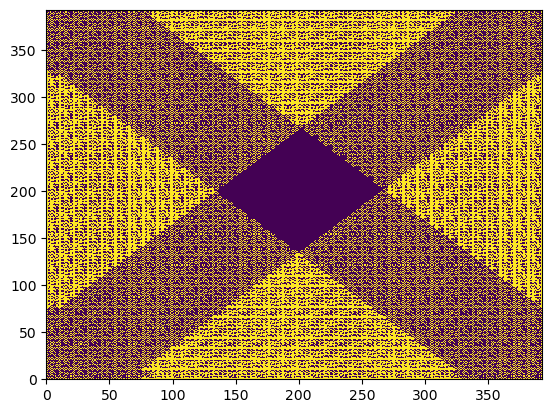

In [132]:
plt.pcolormesh(final_dim)

In [80]:
from scipy.optimize import curve_fit

# Given data
steps = np.array([6, 10, 50, 100, 500, 1000, 5000])
garden_plots = np.array([16, 50, 1594, 6536, 167004, 668697, 16733044])


# Define the function for the polynomial regression
def polynomial_function(x, *coefficients):
    return np.polyval(coefficients, x)


# Perform the polynomial regression
degree = 2  # You can adjust the degree of the polynomial

# Provide an initial guess for the coefficients
initial_guess = np.ones(degree + 1)
coefficients, _ = curve_fit(polynomial_function, steps, garden_plots, p0=initial_guess)

In [82]:
new_steps = np.array([2000, 50000, 100000])
polynomial_function(new_steps, *coefficients)

array([2.67638456e+06, 1.67363629e+09, 6.69461835e+09])

In [95]:
steps = np.array([6, 10, 50, 100, 250, 500, 1000, 5000], dtype="long")
garden_plots = np.array(
    [
        43,
        105,
        2291,
        9213,
        56658,
        225694,
        901212,
    ],
    dtype="float",
)
# garden_plots = [move_garden_infinite(data, nb_steps=i) for i in steps]


# Define the function for the polynomial regression
def polynomial_function(x, *coefficients):
    return np.polyval(coefficients, x)


# Perform the polynomial regression
degree = 2  # You can adjust the degree of the polynomial

# Provide an initial guess for the coefficients
initial_guess = np.ones(degree + 1)
coefficients, _ = curve_fit(polynomial_function, steps, garden_plots, p0=initial_guess)

In [96]:
polynomial_function(1000, *coefficients)

901207.6145395581

In [76]:
np.polyval(coefficients, 1000)

901212.0000000129

In [71]:
polynomial_func(1200)

-51694.583767611235

In [ ]:
data = puzzle.input_data.split("\n")
data = np.array([list(d) for d in data], dtype="object")
# move_garden_infinite(data, nb_steps=26501365)

# Day 22

In [275]:
puzzle = Puzzle(year=2023, day=22)

In [280]:
def brick_range(brick):
    (x0, y0, z0), (x1, y1, z1) = brick
    if x0 != x1:
        return [(x, y0, z0) for x in range(x0, x1 + 1)]
    if y0 != y1:
        return [(x0, y, z0) for y in range(y0, y1 + 1)]
    if z0 != z1:
        return [(x0, y0, z) for z in range(z0, z1 + 1)]
    return [(x0, y0, z0)]


def supported(wall, brick):
    return any((x, y, z - 1) in wall for (x, y, z) in brick_range(brick)) or any(
        [z == 1 for (x, y, z) in brick_range(brick)]
    )


def brick_supported(brick1, brick2):
    # to construct a tree of parents/children bricks
    for x, y, z in brick_range(brick1):
        if (x, y, z + 1) in brick_range(brick2):
            return True
    return False


def plot_wall(wall):
    # to quickly validate
    xr = [x[0] for x in wall]
    zr = [x[2] for x in wall]
    xmin, xmax = min(xr), max(xr)
    zmin, zmax = min(zr), max(zr)

    walls_str = np.full((zmax + 1, xmax + 1), "-")

    for i, w in enumerate(wall):
        x, z = w[0], w[2]
        walls_str[z][x] = i
    return np.flipud(walls_str)


def disintegration(data):
    # order bricks closer to the ground
    bricks0 = []
    for d in data:
        c0, c1 = d.split("~")
        xd, yd, zd = (int(s) for s in c0.split(","))
        xf, yf, zf = (int(s) for s in c1.split(","))
        bricks0.append([(xd, yd, zd), (xf, yf, zf)])
    bricks0 = sorted(bricks0, key=lambda b: b[0][2])

    # now start again and lowered the bricks that
    # are not supported / floating
    bricks = []
    wall = set()
    for b in bricks0:
        (x0, y0, z0), (x1, y1, z1) = b

        while not supported(wall, [(x0, y0, z0), (x1, y1, z1)]):
            z0 -= 1
            z1 -= 1
        bricks.append([(x0, y0, z0), (x1, y1, z1)])

        for x, y, z in brick_range(bricks[-1]):
            wall.add((x, y, z))
    bricks = sorted(bricks, key=lambda b: b[0][2])

    N = len(bricks)
    parents = {i: [] for i in range(N)}
    children = {i: [] for i in range(N)}
    for i, b1 in enumerate(bricks):
        for j, b2 in enumerate(bricks):
            if b2[0][2] > b1[1][2] + 1:
                break

            if j > i and brick_supported(b1, b2):
                parents[j].append(i)
                children[i].append(j)

    # j in disintegration[i] means i ALONE supports j
    disintegration = {i: [] for i in range(N)}
    for i in range(N):
        for j in range(N):
            if parents[j] == [i]:
                disintegration[i].append(j)

    return (
        sum(len(disintegration[i]) == 0 for i in range(N)),
        bricks,
        parents,
        children,
    )


def falling_bricks(bricks, parents, children):
    total = 0
    N = len(bricks)

    # traverse the tree starting from the ground (stable bricks) but ignore current brick i
    # if we see other bricks, it means they are supported
    # by something else (or the ground!)
    # So the brick falling are N - stable bricks
    for i in range(N):
        stack = [j for j in range(N) if bricks[j][0][2] == 1 and j != i]
        stable = {j for j in range(N) if bricks[j][0][2] == 1}

        while len(stack) > 0:
            bi = stack.pop()
            # not brick itself to find brick supported by
            # brick K
            if bi != i:
                for b in children[bi]:
                    if b not in stable:
                        stack.append(b)
                        stable.add(b)
        total += N - len(stable)
    return total

In [281]:
data = puzzle.examples[0].input_data.split("\n")
c, bricks, parents, children = disintegration(data)
assert c == 5
assert falling_bricks(bricks, parents, children) == 7

In [282]:
data = puzzle.input_data.split("\n")
c, grounded_bricks, parents, children = disintegration(data)
puzzle.answer_a = c
puzzle.answer_b = falling_bricks(grounded_bricks, parents, children)

# Day 23

In [68]:
puzzle = Puzzle(year=2023, day=23)

In [73]:
# for this one I copied from Day 10 and slightly modify
# since it looked very similar
def find_dir(path):
    prev = path[-2]
    next = path[-1]
    if prev[1] > next[1]:
        return "W"
    if prev[1] < next[1]:
        return "E"
    if prev[0] > next[0]:
        return "N"
    if prev[0] < next[0]:
        return "S"


def find_path_start_end(data):
    for i0, el in enumerate(data[0]):
        if el == ".":
            break

    for i1, el in enumerate(data[-1]):
        if el == ".":
            break

    return 0, i0, len(data) - 1, i1


def find_possible_dir(data, path, tile):
    indices = []
    i, j = tile
    c = data[i][j]

    if c == "^":
        return [(i - 1, j)]
    if c == ">":
        return [(i, j + 1)]
    if c == "v":
        return [(i + 1, j)]
    if c == "<":
        return [(i, j - 1)]

    # lookup for possibility
    # of regular path
    for ix in [-1, 1]:
        ii = i + ix
        cur_dir = find_dir([(i, j), (ii, j)])

        if ii >= 0 and ii < len(data):
            if (
                data[ii][j] in "."
                or (data[ii][j] == "^" and cur_dir != "S")
                or (data[ii][j] == "v" and cur_dir != "N")
                or (data[ii][j] == "<" and cur_dir != "E")
                or (data[ii][j] == ">" and cur_dir != "W")
            ):
                indices.append((ii, j))

    for jx in [-1, 1]:
        jj = j + jx
        cur_dir = find_dir([(i, j), (i, jj)])

        if jj >= 0 and jj < len(data[0]):
            if (
                data[i][jj] in "."
                or (data[i][jj] == "^" and cur_dir != "S")
                or (data[i][jj] == "v" and cur_dir != "N")
                or (data[i][jj] == "<" and cur_dir != "E")
                or (data[i][jj] == ">" and cur_dir != "W")
            ):
                indices.append((i, jj))

    # path can't go back to itself
    indices = [i for i in indices if i not in path]

    return indices


def find_possible_dir_partb(data, path, tile):
    indices = []
    i, j = tile
    c = data[i][j]

    # lookup for possibility
    # of regular path
    for ix in [-1, 1]:
        ii = i + ix
        cur_dir = find_dir([(i, j), (ii, j)])

        if ii >= 0 and ii < len(data):
            if data[ii][j] in ".^v<>":
                indices.append((ii, j))

    for jx in [-1, 1]:
        jj = j + jx
        cur_dir = find_dir([(i, j), (i, jj)])

        if jj >= 0 and jj < len(data[0]):
            if data[i][jj] in ".^v<>":
                indices.append((i, jj))

    # path can't go back to itself
    indices = [i for i in indices if i not in path]

    return indices


def solve_path(data, slippery=True, debug=False):
    # find initial position
    i0, j0, i1, j1 = find_path_start_end(data)
    start = (i0, j0)
    end = (i1, j1)

    # one list for the path
    paths_length = []
    path = []
    path.append(start)

    # one dictionnary
    # index of path -> possible directions
    bifurcations = {}

    tile = start
    # for i in range(100):
    while True:
        if debug:
            print(f"{path=}")

        if slippery:
            split = find_possible_dir(data, path, tile)
        else:
            split = find_possible_dir_partb(data, path, tile)

        # add possible paths to bifurcations
        # list at the current index of the paths
        if len(split):
            for s in split:
                if len(path) not in bifurcations:
                    bifurcations[len(path)] = []
                bifurcations[len(path)].append(s)

        # get one of the next possibility
        try:
            tile = bifurcations[len(path)].pop()
            if len(bifurcations[len(path)]) == 0:
                del bifurcations[len(path)]
        except:
            if len(bifurcations):
                while len(path) > max(bifurcations.keys()):
                    path.pop()
                tile = bifurcations[len(path)].pop()
                if len(bifurcations[len(path)]) == 0:
                    del bifurcations[len(path)]
            else:
                break

        path.append(tile)
        # print("Found exit end")
        if tile == end:
            paths_length.append(len(path) - 1)
            if len(bifurcations) == 0:
                break

        if debug:
            print(f"{tile=}")
            print()

    return paths_length

In [74]:
data = puzzle.examples[0].input_data.split("\n")
lengths = solve_path(data)
lengths_b = solve_path(data, slippery=False)
assert max(lengths) == 94
assert max(lengths_b) == 154

In [ ]:
data = puzzle.input_data.split("\n")
lengths = solve_path(data)
lengths_b = solve_path(data, slippery=False)

In [691]:
puzzle.answer_a = max(lengths)
puzzle.answer_b = max(lengths_b)

2170

In [ ]:
# have to calculate the length of all paths between bifurcation
# store [(i0, j0), (i1, j1), length]
# then reconstruct paths matching beginnning and ends of segments
# until the end of the 

# Day 24

In [7]:
puzzle = Puzzle(year=2023, day=24)

In [8]:
from z3 import IntVector, Solver
import itertools


def parse_haildata(d):
    d = d.split(" @ ")
    pos, vel = d[0], d[1]
    pos = tuple(int(i) for i in pos.split(","))
    vel = tuple(int(i) for i in vel.split(","))
    return pos, vel


def hail_intersec(pos1, vel1, pos2, vel2, min_xy=(7, 27), debug=False):
    # Extract points coordinates and speeds for each particle
    x1, y1, z1 = pos1
    vx1, vy1, vz1 = vel1
    x2, y2, z2 = pos2
    vx2, vy2, vz2 = vel2

    det = vx1 * vy2 - vy1 * vx2
    if det == 0:  # parallel
        return False

    m1 = vy1 / vx1
    q1 = -m1 * x1 + y1
    m2 = vy2 / vx2
    q2 = -m2 * x2 + y2

    # intersection
    xc = (q2 - q1) / (m1 - m2)
    yc = m1 * xc + q1

    if not (min_xy[0] <= xc <= min_xy[1] and min_xy[0] <= yc <= min_xy[1]):
        return False

    # only in future
    t1 = (xc - x1) / vx1
    t2 = (xc - x2) / vx2

    if t1 < 0 or t2 < 0:
        return False

    if debug:
        print(f"{xc=}")
        print(f"{yc=}")
        print(f"{t1=}")
        print(f"{t2=}")
        print()

    return True  # Particles will intersect in the future

In [37]:
# test
data = puzzle.examples[0].input_data.split("\n")

c1, c2 = 0, 0
for pairs in itertools.combinations(range(len(data)), 2):
    pos1, vel1 = parse_haildata(data[pairs[0]])
    pos2, vel2 = parse_haildata(data[pairs[1]])
    if hail_intersec(pos1, vel1, pos2, vel2):
        c1 += 1

assert c1 == 2

# have to solve a n non linear equations systems like for the example:
# 3 equations per hail
# a + b t1 = 19 - 2*t1
# c + d t1 = 13 + t1
# d + f t1 = 30 - 2*t1
# ...
# a + b t5 = 20 - t5
# c + d t5 = 19 - 5*t5
# d + f t5 = 15 - 3*t5

# rock position and speed
rx, ry, rz, rvx, rvy, rvz = IntVector("unknown", 6)
times = IntVector("t", len(data))

s = Solver()
for t, d in zip(times, data):
    hp, hv = parse_haildata(d)
    s.add(rx + rvx * t == hp[0] + hv[0] * t)
    s.add(ry + rvy * t == hp[1] + hv[1] * t)
    s.add(rz + rvz * t == hp[2] + hv[2] * t)

s.check()
m = s.model()
assert sum(m[v].as_long() for v in (rx, ry, rz)) == 47

In [40]:
# part a
data = puzzle.input_data.split("\n")
c = 0
for pairs in itertools.combinations(range(len(data)), 2):
    pos1, vel1 = parse_haildata(data[pairs[0]])
    pos2, vel2 = parse_haildata(data[pairs[1]])
    if hail_intersec(pos1, vel1, pos2, vel2, min_xy=(200000000000000, 400000000000000)):
        c += 1
puzzle.answer_a = c

# part b
neq = 3  # with 3 hail trajectories the system is complete
rx, ry, rz, rvx, rvy, rvz = IntVector("unknown", 6)
times = IntVector("t", neq)

s = Solver()
for t, d in zip(times, data[:neq]):
    hp, hv = parse_haildata(d)
    s.add(rx + rvx * t == hp[0] + hv[0] * t)
    s.add(ry + rvy * t == hp[1] + hv[1] * t)
    s.add(rz + rvz * t == hp[2] + hv[2] * t)

s.check()
m = s.model()

puzzle.answer_b = sum(m[i].as_long() for i in (rx, ry, rz))

# Day 25

In [798]:
puzzle = Puzzle(year=2023, day=25)

In [945]:
data = [
    "jqt: rhn xhk nvd",
    "rsh: frs pzl lsr",
    "xhk: hfx",
    "cmg: qnr nvd lhk bvb",
    "rhn: xhk bvb hfx",
    "bvb: xhk hfx",
    "pzl: lsr hfx nvd",
    "qnr: nvd",
    "ntq: jqt hfx bvb xhk",
    "nvd: lhk",
    "lsr: lhk",
    "rzs: qnr cmg lsr rsh",
    "frs: qnr lhk lsr",
]

# I started implemented myself and then found out about the Stoer Wagner algorithm
# which truns out it is implemented in networkx
# since it's Christmas... that's it for me.
import networkx as nx

g = nx.Graph()

for d in data:
    l, r = d.split(": ")
    for i in r.split():
        g.add_edge(l, i)
cv, p = nx.stoer_wagner(g)
assert len(p[0]) * len(p[1]) == 54

In [946]:
# part a
data = puzzle.input_data.split("\n")

g = nx.Graph()

for d in data:
    l, r = d.split(": ")
    for i in r.split():
        g.add_edge(l, i)
cv, p = nx.stoer_wagner(g)

puzzle.answer_a = len(p[0]) * len(p[1])